### Importing all the necessary libraries for the Dyslexia Destection

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt# doctest: +SKIP
from sklearn.metrics import mean_absolute_error
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

### Importing, cleaning and preprocessing the dataset 

In [2]:
#Reading the dataset
data=pd.read_csv('labeled_dysx.csv')
#Value to be predicted by the model.
y=data.Label 
#Input taken by the model.
X=data.drop(['Label'],axis=1) 
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'labeled_dysx.csv'

In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])

In [ ]:
# print out multiple patients at the same time
data.loc[:10]

In [3]:
print("------ Printing the first 5 rows from the dataset to check the whether the data has been fetched properly or not :")
print(data.head(5)) 

pd.set_option("display.max.columns", None)

print("\n------ Total Number Of Rows and Colums In The Dataset :\n",data.shape)

print("\n------ See the all the Columns Present In The Dataset :\n")
print(data.columns.values )

print("\n------ The Information about each Column of the dataset (including their datatypes and the type of values (Null/Not Null) :\n")
print("\n------ Checking whether the Dataset has any Data Quality Issues such as Having NULL Values\n")
print(data.info())

print("\n------ Finding out the count, mean, standard deviation, minimum and maximum values and the quantiles of the data in the Dataset :\n")
print(data.describe())

------ Printing the first 5 rows from the dataset to check the whether the data has been fetched properly or not :


NameError: name 'data' is not defined

In [4]:
print("\n------ To check the Missing Values In the Dataset :\n")
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Check the Missing Values In the Dataset")
plt.grid(True,color='r')
plt.show()


------ To check the Missing Values In the Dataset :



NameError: name 'data' is not defined

In [5]:
print("\n------ Finding out the Correlations Between The Different Variables Using the HEAT MAP :\n")
correlations=data.corr()

sns.heatmap(correlations,annot=True)
plt.title("Correation Between The Different Variables :\n")
plt.show()


------ Finding out the Correlations Between The Different Variables Using the HEAT MAP :



NameError: name 'data' is not defined

### Training and testing datasets

In [6]:
#In the given data, the label is the indication for whether the person has dislexia or not.
#Label = 0 means that there is a high chance that the person has dislexia.
#Label = 1 means that there is a moderte chance that the person has dislexia.
#Label = 2 means that there is a low chance that the person has dislexia.
#The Survey_Score is calculated on the basis of the answers to the quiz given by the applicant.

In [7]:
#The following test cases will be used to check the values given by each model.
test1 = np.array([[0.5, 0.1, 0.2, 0.8, 0.3, 0.5]]) #Readings for applicant 1.
test2 = np.array([[0.7, 0.9, 0.4, 0.9, 0.3, 0.8]]) #Readings for applicant 2.
test3 = np.array([[0.1, 0.7, 0.2, 0.6, 0.9, 0.6]]) #Readings for applicant 3.
test4 = np.array([[0.3, 0.4, 0.5, 0.3, 0.3, 0.5]]) #Readings for applicant 4.

In [8]:
#Creating the test and train data sets for the given data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=10)
#list to store precision values of each model.
precision = [0, 0, 0, 0, 0]
#list to store recall values of each model.
recall = [0, 0, 0, 0, 0]
#list to store f1-score values of each model.
fscore = [0, 0, 0, 0, 0]
#list to store error in predictions of each model.
error = [.0, .0, .0, .0, .0]

NameError: name 'X' is not defined

In [9]:
#StandardScalar is used for preprocessing of data.
#'copy' is False, which means copies are avoid and inplace scaling is done instead.
sc=StandardScaler(copy=False)
sc.fit_transform(X_train)
sc.transform(X_test)

NameError: name 'X_train' is not defined

In [10]:
#Creating lists of label outputs given in each test case by different models
label_1 = [0, 0, 0, 0, 0]
label_2 = [0, 0, 0, 0, 0]
label_3 = [0, 0, 0, 0, 0]
label_4 = [0, 0, 0, 0, 0]

## Model : Descison Tree Model (Supervised ML)

In [11]:
#Creating the DecisionTree model.
dt = DecisionTreeClassifier(random_state = 1)
#Training the model.
dt.fit(X_train, y_train)
#Making predictions using the decision tree model.
pred_dt = dt.predict(X_test)
#Calculating error
error[0] = round(mean_absolute_error(y_test, pred_dt), 3)

NameError: name 'X_train' is not defined

In [12]:
#Testing the model with predefined test cases.
ans_1 = dt.predict((test1))
ans_2 = dt.predict((test2))
ans_3 = dt.predict((test3))
ans_4 = dt.predict((test4))

#Storing the above predictions into respective lists.
label_1[0] = ans_1[0]
label_2[0] = ans_2[0]
label_3[0] = ans_3[0]
label_4[0] = ans_4[0]

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [13]:
#Confusion matrix for Decision tree model.
print(confusion_matrix(np.array(y_test), pred_dt))
plot_confusion_matrix(dt, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for Decision Tree Model and updating values in respective lists.
precision[0], recall[0], fscore[0], Nil = precision_recall_fscore_support(y_test, pred_dt, average='macro')
print('For a DecisionTreeClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[0], recall[0], fscore[0]))

NameError: name 'y_test' is not defined

## Model : Random Classifier

In [14]:
#Creating the RandomClassifier model.
rf = RandomForestClassifier(random_state = 0) 
#Training the model.
rf.fit(X_train, y_train)
#Making predictions using the model.
pred_rf = rf.predict(X_test)
#Calculating error
error[1] = round(mean_absolute_error(y_test, pred_rf), 3)

NameError: name 'X_train' is not defined

In [15]:
#Testing the model with predefined test cases.
ans_1 = rf.predict((test1))
ans_2 = rf.predict((test2))
ans_3 = rf.predict((test3))
ans_4 = rf.predict((test4))

#Storing the above predictions into respective lists.
label_1[1] = ans_1[0]
label_2[1] = ans_2[0]
label_3[1] = ans_3[0]
label_4[1] = ans_4[0]

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Confusion matrix for RandomForest model.
print(confusion_matrix(np.array(y_test), pred_rf))
plot_confusion_matrix(rf, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for RandomForest Model and updating values in respective lists.
precision[1], recall[1], fscore[1], Nil = precision_recall_fscore_support(y_test, pred_rf, average='macro')
print('For a RandomForestClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[1], recall[1], fscore[1]))

## Model : Random Classifier with GridSearch

In [16]:
#Creating a list of possible n_estimators.
n_est = {'n_estimators' : [10,100,500,1000]}
#Creating a RandomForest model using the value of n_estimators given by GridSearch for best result.
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0),n_est,scoring='f1_macro')
#Training the model
rf_grid.fit(X_train, y_train)
#Making predictions using the model.
pred_rf_grid = rf_grid.predict(X_test)
#Printing the value of n_estimator used in the model.
#This value provides the most accurate predictions for our dataset.
print('Best value of n_estimator for RandomForest model is:')
print(rf_grid.best_params_)
#Calculating error
error[3] = round(mean_absolute_error(y_test, pred_rf_grid), 3)

NameError: name 'X_train' is not defined

In [17]:
#Testing the model with predefined test cases.
ans_1 = rf_grid.predict((test1))
ans_2 = rf_grid.predict((test2))
ans_3 = rf_grid.predict((test3))
ans_4 = rf_grid.predict((test4))

#Storing the above predictions into respective lists.
label_1[3] = ans_1[0]
label_2[3] = ans_2[0]
label_3[3] = ans_3[0]
label_4[3] = ans_4[0]

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Confusion matrix for RandomForest model using GridSearch
print(confusion_matrix(np.array(y_test), pred_rf_grid))
plot_confusion_matrix(rf_grid, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for RandomForest (GridSearch) model and updating values in respective lists.
precision[3], recall[3], fscore[3], Nil = precision_recall_fscore_support(y_test, pred_rf_grid, average='macro')
print('For a RandomForest model with GridSearch:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[3], recall[3], fscore[3]))

## Model : Support Vector Machine

In [18]:
#Creating the SVM model.
svm = SVC(kernel = "linear")
#Training the model.
svm.fit(X_train, y_train)
#Making predictions using the model.
pred_svm = svm.predict(X_test)
#Calculating error
error[2] = round(mean_absolute_error(y_test, pred_svm), 3)

NameError: name 'X_train' is not defined

In [19]:
#Testing the model with predefined test cases.
ans_1 = svm.predict((test1))
ans_2 = svm.predict((test2))
ans_3 = svm.predict((test3))
ans_4 = svm.predict((test4))

#Storing the above predictions into respective lists.
label_1[2] = ans_1[0]
label_2[2] = ans_2[0]
label_3[2] = ans_3[0]
label_4[2] = ans_4[0]

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Confusion matrix for SVM model
print(confusion_matrix(np.array(y_test), pred_svm))
plot_confusion_matrix(svm, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for SVM model and updating values in respective lists.
precision[2], recall[2], fscore[2], Nil = precision_recall_fscore_support(y_test, pred_svm, average='macro')
print('For a SVM model:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[2], recall[2], fscore[2]))

## Model : Support Vector Machine with GridSearch

In [20]:
#options_parameters is a list of dictionaries to find the most suitable values of 'kernel', 'gamma' and 'C' for the given model.
options_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
#Creating SVM model with the most suitable parameters obtained by using GridSearch.
svm_grid = GridSearchCV(SVC(), options_parameters,scoring='f1_macro')
#Training the model.
svm_grid.fit(X_train, y_train)
#Making predictions using the model.
pred_svm_grid = svm_grid.predict(X_test)
#Printing the values of 'C', 'gamma' and 'kernel' used in our model.
#These values provide the most accurate predictions for the given dataset.
print('Best parameters of SVM model are:')
print(svm_grid.best_params_)
#Calculating error
error[4] = round(mean_absolute_error(y_test, pred_svm_grid), 3)

NameError: name 'X_train' is not defined

In [21]:
#Testing the model with predefined test cases.
ans_1 = svm_grid.predict((test1))
ans_2 = svm_grid.predict((test2))
ans_3 = svm_grid.predict((test3))
ans_4 = svm_grid.predict((test4))

#Storing the above predictions into respective lists.
label_1[4] = ans_1[0]
label_2[4] = ans_2[0]
label_3[4] = ans_3[0]
label_4[4] = ans_4[0]

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
#Confusion matrix for SVM model using GridSearch
print(confusion_matrix(np.array(y_test), pred_svm_grid))
plot_confusion_matrix(svm_grid, X_test, y_test)
plt.show()
#Finding precision, recall and f-score for SVM (GridSearch) model and updating values in respective lists.
precision[4], recall[4], fscore[4], Nil = precision_recall_fscore_support(y_test, pred_svm_grid, average='macro')
print('For a SVM model with GridSearch:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[4], recall[4], fscore[4]))

NameError: name 'y_test' is not defined

### Comparing errors of diffferent models :

In [23]:
#list of models
models = ['DecisionTree', 'RandomForest', 'RandomForest\n(GridSearch)', 'SVM\t', 'SVM\n(GridSearch)']
print('Model\t\tError')
for i in range(5):
    print('{}\t{}'.format(models[i],error[i]))

Model		Error


NameError: name 'error' is not defined

In [ ]:
#From the above result, we can observe that the error is maximum in SVM and SVM with GridSearch model.
#Error is minimum in DecisionTree Model.
#We can't decide the best model for the given dataset only on the basis of error.
#In order to find the best fit, we need to consider precision and recall as well.

### Comparing results of diffferent models :

In [24]:
#Printing label lists
print(label_1)
print(label_2)
print(label_3)
print(label_4)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


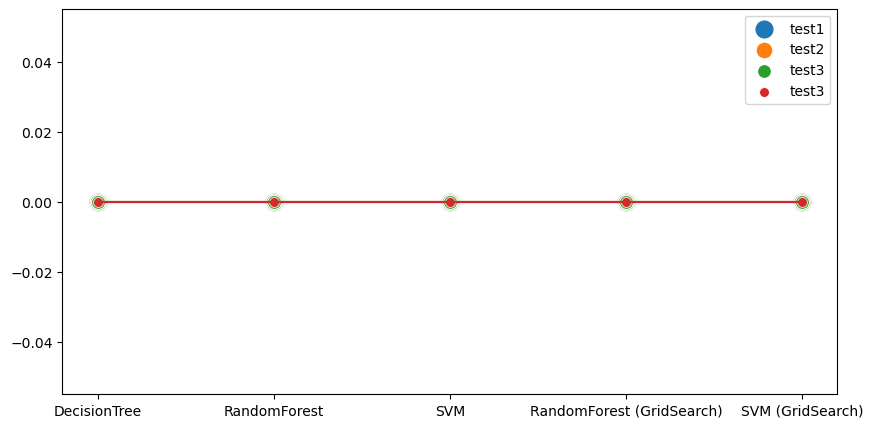

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_1, s = 200, label = 'test1',)
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_2, s = 150, label = 'test2')
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_3, s = 100, label = 'test3')
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_4, s = 50, label = 'test3')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_1)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_2)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_3)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
                y = label_4)
plt.show()

In [26]:
#Creating a line plot to compare teh precision, recall and f1-score of all the models.
#This graph is plotted to find the best fit for our dataset.
plt.figure(figsize=(15,5))
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
             y = precision,label = 'precision')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
             y = recall,label = 'recall')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM', 'RandomForest (GridSearch)', 'SVM (GridSearch)'], 
             y = fscore,label = 'f1-score')
plt.show()

NameError: name 'precision' is not defined

<Figure size 1500x500 with 0 Axes>

In [ ]:
#From the above plot, we can see that the RandomForest model with GridSearch is the best fit for the given dataset.

## Predicting results for the four applicants with the best fit model :

In [ ]:
#Therefore the most accurate results for all the applicants are as follows.
possibility = {0: "High", 1: "Moderate", 2: "Low"}
print('Applicant\tLabel\tPossibility of Dyslexia')
print('1\t\t{}\t\t{}'.format(label_1[3], possibility[label_1[3]]))
print('2\t\t{}\t\t{}'.format(label_2[3], possibility[label_2[3]]))
print('3\t\t{}\t\t{}'.format(label_3[3], possibility[label_3[3]]))
print('4\t\t{}\t\t{}'.format(label_4[3], possibility[label_4[3]]))